## Traffic Signs Classification 

The goal is to classify the images of traffic signs with the deep learning LeNet Architecture in Keras. 

---

In [1]:
# Import libraries 

import warnings
warnings.filterwarnings("ignore")

import os
import pickle
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random

In [2]:
# The pickle module implementation of binary protocols for serializing and de-serializing a Python object structure

os.chdir('//Users/mareksturek/Documents/GitHub/real-application/data')

with open("./tstrain.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./tsvalid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./tstest.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
# Labeling of training, validation and test split

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
# Shape indepedent variable

X_train.shape

(34799, 32, 32, 3)

In [5]:
# Shape dependent variable

y_train.shape

(34799,)

0

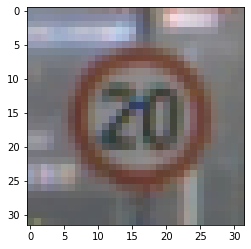

In [6]:
# Image exploration 

i = 10000
plt.imshow(X_train[i])
y_train[i]

In [7]:
# Data preparation
# Shuffle the dataset 

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [8]:
# Changed from color to gray scale

X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [9]:
# Normalized gray scale  

X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [10]:
# Shape of indepedent variable 

X_train_gray.shape

(34799, 32, 32, 1)

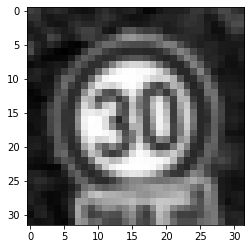

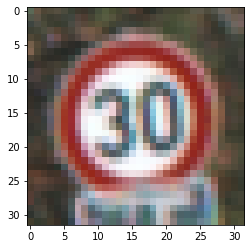

In [11]:
# Image exploration and squeeze on gray scale 

i = 9000
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [12]:
# Model training 

# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [13]:
# Image shape

image_shape = X_train_gray[i].shape

In [14]:
# Build the CNN model

cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [15]:
# Create compiler

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [16]:
# Train the model

history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 12s 173ms/step - loss: 3.1129 - accuracy: 0.1881 - val_loss: 2.5119 - val_accuracy: 0.3395
Epoch 2/50
70/70 [==============================] - 10s 149ms/step - loss: 1.5960 - accuracy: 0.5567 - val_loss: 1.3043 - val_accuracy: 0.6329
Epoch 3/50
70/70 [==============================] - 11s 154ms/step - loss: 0.8964 - accuracy: 0.7541 - val_loss: 0.9659 - val_accuracy: 0.7127
Epoch 4/50
70/70 [==============================] - 11s 162ms/step - loss: 0.6269 - accuracy: 0.8293 - val_loss: 0.7466 - val_accuracy: 0.7803
Epoch 5/50
70/70 [==============================] - 12s 166ms/step - loss: 0.4681 - accuracy: 0.8760 - val_loss: 0.6864 - val_accuracy: 0.7934
Epoch 6/50
70/70 [==============================] - 12s 167ms/step - loss: 0.3807 - accuracy: 0.8987 - val_loss: 0.6314 - val_accuracy: 0.8136
Epoch 7/50
70/70 [==============================] - 12s 172ms/step - loss: 0.3203 - accuracy: 0.9168 - val_loss: 0.5388 - val_accuracy: 0.8413

In [17]:
# Test accuracy

score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8833


In [18]:
# Model evaluation

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

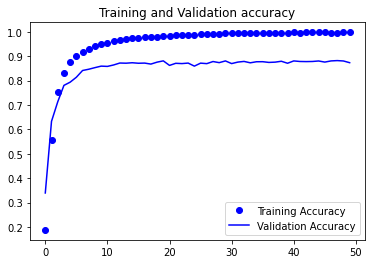

In [19]:
# Plot the training & validation accuracy

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

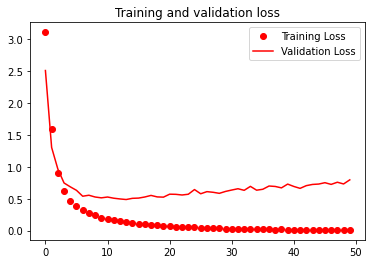

In [20]:
# Plot the training & validation loss

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
# Predictions for the test data

predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

# Get the indices to be plotted
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

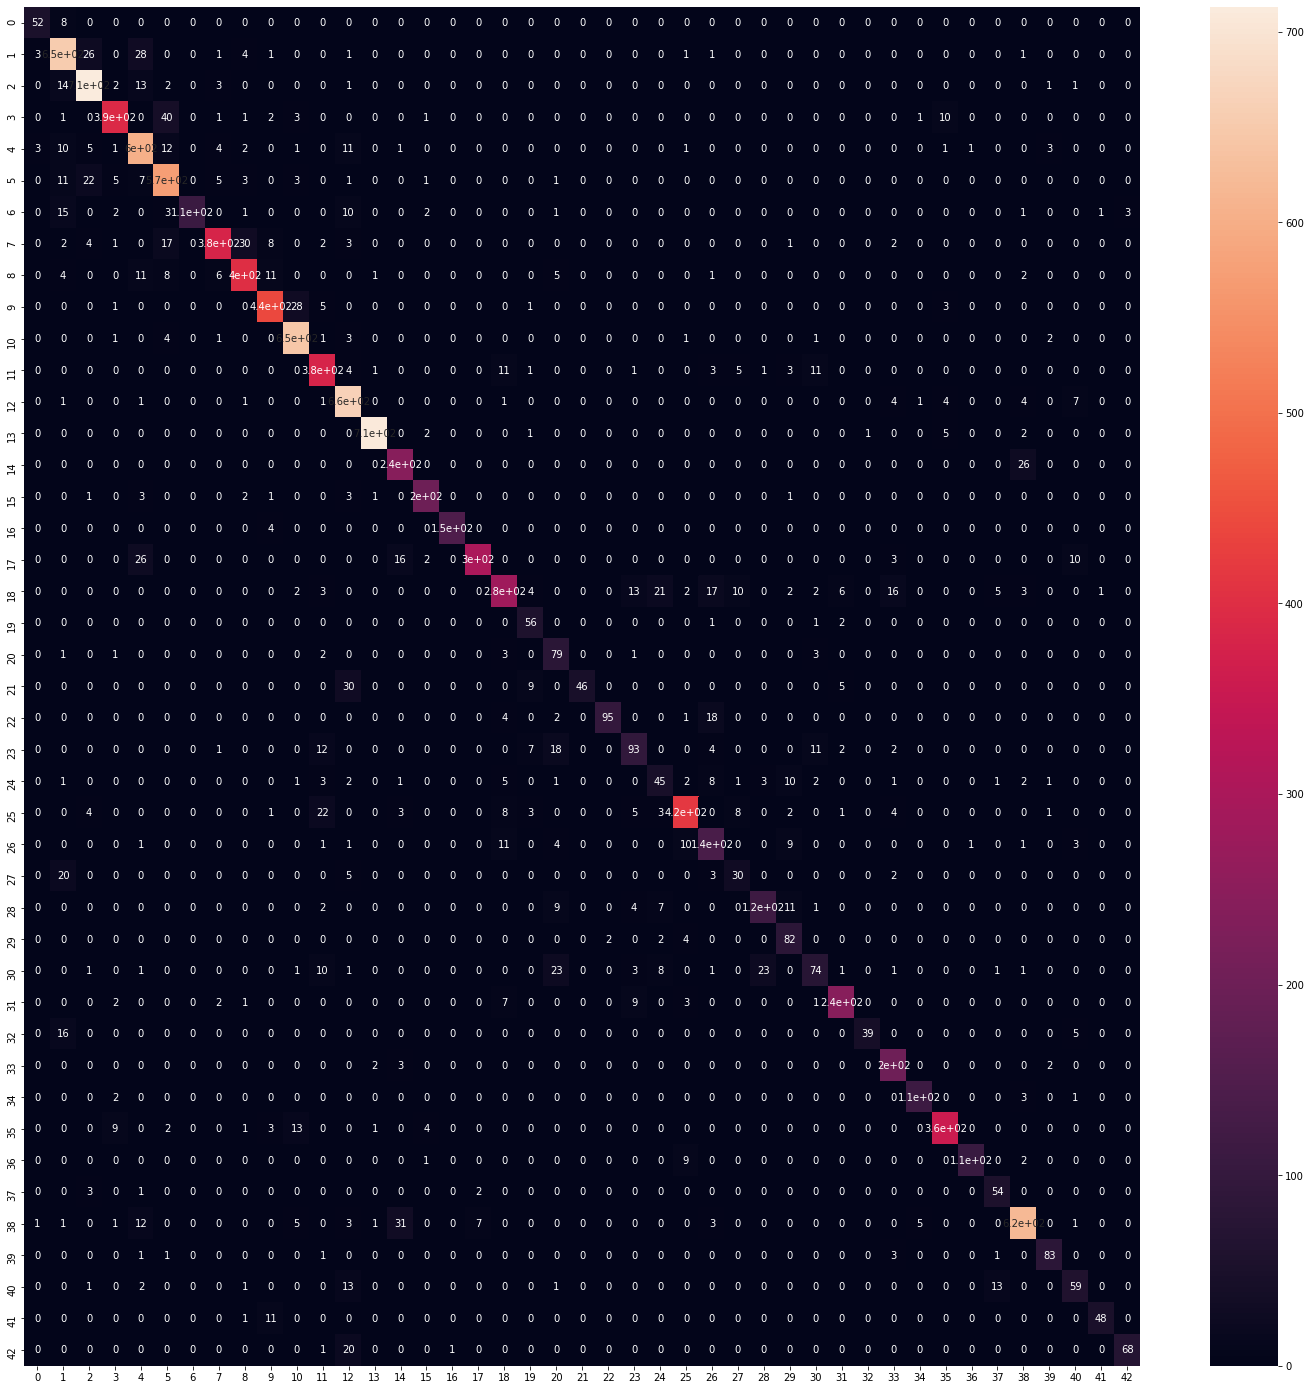

In [22]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

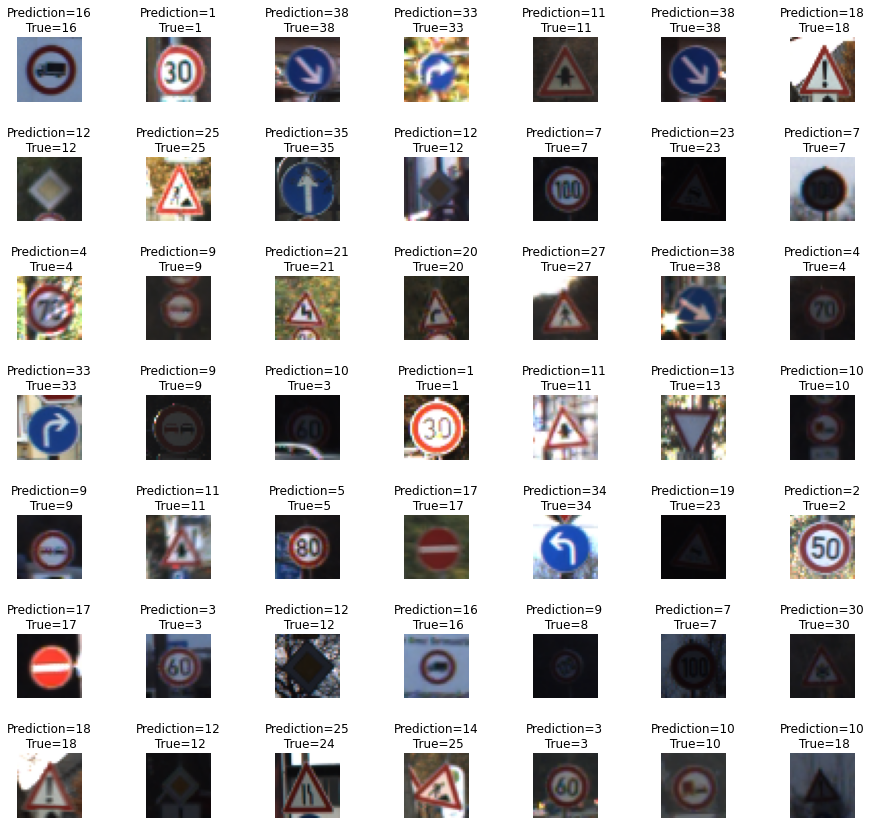

In [23]:
# Prediction results 

L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)